In [ ]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calplot
from sklearn.preprocessing import MinMaxScaler

EXOGENEOUS VARAIBLES

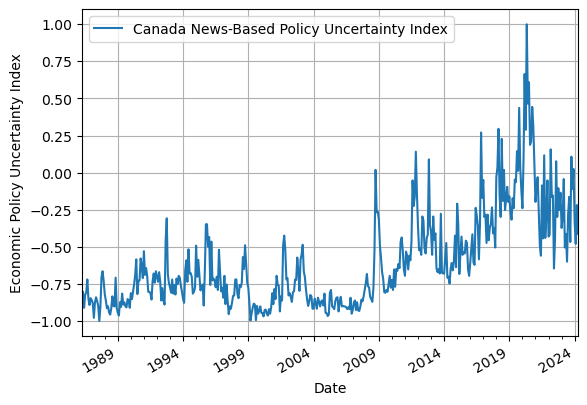

In [497]:
# Economic Policy Uncertainty Index # from Economic Policy Uncertainty
df = pd.read_csv("Canada_Policy_Uncertainty_Data.csv")
df = df.dropna()
df = df.drop(df.index[0:15])
df = df.drop(df.index[-1])

df["Month"] = df['Month'].astype(int)
df["Date"] = df["Year"].astype(str) + '-' + df["Month"].astype(str) + '-01'
df.drop(['Year', 'Month'], axis='columns', inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])

scaler = MinMaxScaler(feature_range=(-1, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

#Plotting
df['Canada News-Based Policy Uncertainty Index'].plot()
plt.gcf().autofmt_xdate()  # Automatically rotate date labels
plt.xlabel('Date') 
plt.ylabel('Economic Policy Uncertainty Index')
plt.legend()
plt.grid(True)
plt.show()

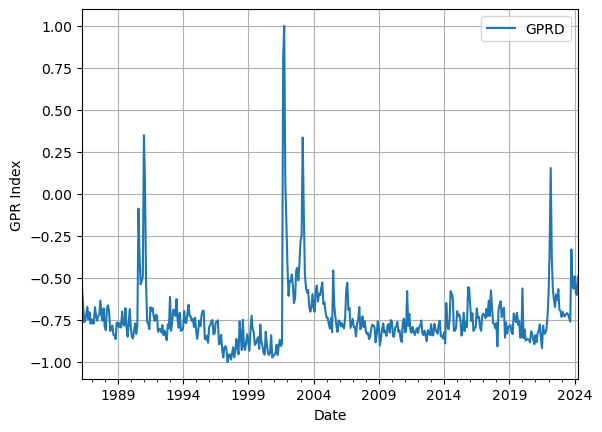

In [498]:
### Geopolitical Risk Index #### from  Caldara and Iacoviello GPR index 
df1 = pd.DataFrame(pd.read_csv("data_gpr_daily_recent.csv"))
# df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)
df1 = df1.drop(["event", 'var_name', 'var_label'], axis=1)
df1 = df1.dropna()
df1[df1.columns[2]]=pd.to_numeric(df1[df1.columns[2]].str.replace(',', ''))
df1[df1.columns[3]]=pd.to_numeric(df1[df1.columns[3]].str.replace(',', ''))
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index(df1['date'])

df1.drop(['date', 'DAY'], axis='columns', inplace=True)
df1= df1.resample('MS').sum()
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)


df1['GPRD']
df1
# #Plotting
df1['GPRD'].plot()
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # Major ticks every 2 units
# plt.gcf().autofmt_xdate()  # Automatically rotate date labels
plt.xlabel('Date') 
plt.grid(True)
plt.ylabel('GPR Index')
plt.legend()
plt.show()




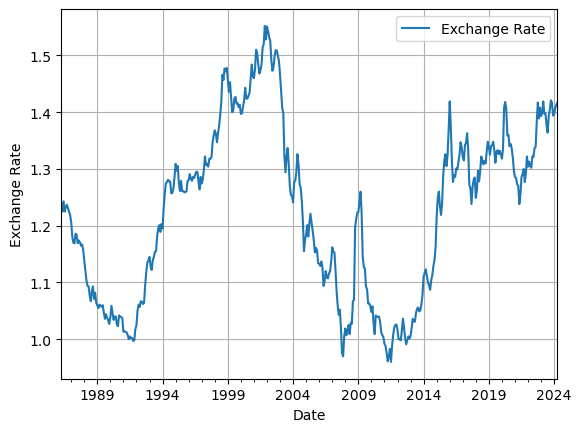

In [460]:
### Exchange Rate #### from USDA -ERS


df2 = pd.DataFrame(pd.read_csv("realmonthlycountryexchangerates.csv", encoding= 'unicode_escape'))
df2 = df2[199:657]
df2 = df2.iloc[:,:3]
df2 = df2.dropna()
df2
#renaming each columns
df2 = df2.rename(columns= {"Monthly real exchange rates (local currency per U.S. dollar)": 'Month', "Unnamed: 1": "Year","Unnamed: 2": "Exchange Rate"})
df2
# print(df2.head())
# print(df2.tail())
# df2.info()

# changes the object type to numeric
df2[df2.columns[2]]=pd.to_numeric(df2[df2.columns[2]])

## Setting date as index
df2["Date"] = df2["Year"].astype(str) + '-' + df2["Month"].astype(str) + '-01'
df2.drop(['Year', 'Month'], axis='columns', inplace=True)
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.set_index(['Date'])
df2

# #Plotting
df2['Exchange Rate'].plot()
plt.xlabel('Date') 
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

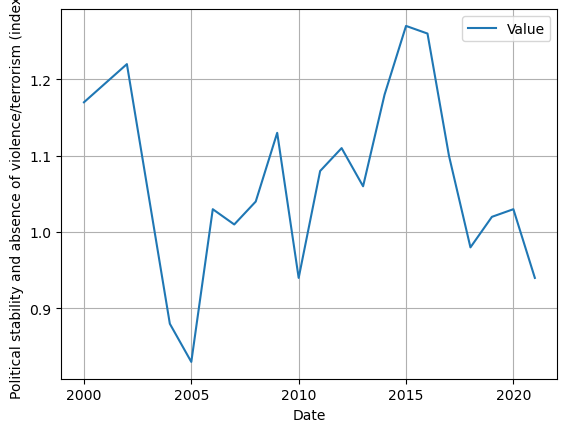

In [499]:
### Political stability and absence of violence/terrorism (index)
 #### from FAOSTAT

df3 = pd.DataFrame(pd.read_csv("FAOSTAT_Political_Stability.csv", encoding= 'unicode_escape'))
# print(df3.head())
# print(df3.tail())
# df3.info()

year = df3.iloc[:, 9]
df3 = df3.iloc[:, [9,11]]

## Setting date as index
year = pd.to_datetime(year)
df3 = df3.set_index('Year')
df3

# #Plotting
df3['Value'].plot()
plt.xlabel('Date') 
plt.ylabel('Political stability and absence of violence/terrorism (index)')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\zohra\AppData\Local\Temp\ipykernel_32676\2461107472.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df5['Date'] = pd.to_datetime(df5['Date'])


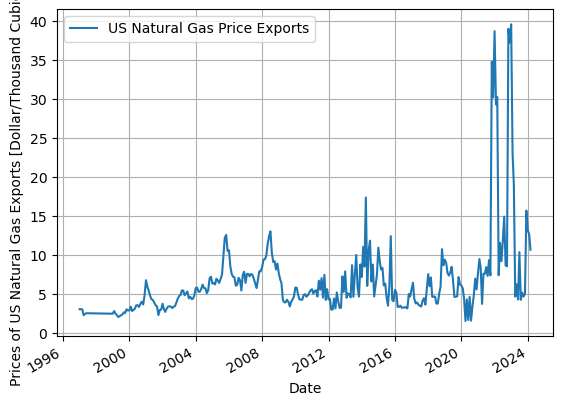

In [500]:
### US Natural Gas Export Prices in 1000 USD
 #### from US Energy Information Administration

df5 = pd.DataFrame(pd.read_csv("NG_PRI_SUM_DCU_NUS_M.csv", encoding= 'unicode_escape'))
df5 = df5.drop(df5.index[0:2])
# df5.info()
df5 = df5[['Back to Contents', 'Unnamed: 4']]
df5 = df5.dropna()
df5 = df5.rename(columns= {"Back to Contents": 'Date', "Unnamed: 4": "US Natural Gas Price Exports"})

# changes the object type to numeric
df5['US Natural Gas Price Exports']=pd.to_numeric(df5['US Natural Gas Price Exports'])

## Setting date as index
df5['Date'] = pd.to_datetime(df5['Date'])
df5 = df5.set_index('Date')
df5

# #Plotting
df5['US Natural Gas Price Exports'].plot()
plt.xlabel('Date') 
plt.ylabel('Prices of US Natural Gas Exports [Dollar/Thousand Cubic feet')
plt.legend()
plt.grid(True)
plt.show()